In [3]:
import numpy as np
import pandas as pd
import os
import nibabel as nib
import pydicom as dicom
import matplotlib.pyplot as plt

# Convert nii file to txt file and plot

In [4]:
HOME = 'D:\\results0622\\Results\\'
subdirs = ['ROISignals_FunImgWCF']

In [5]:
for subdir in subdirs:
    home = HOME + subdir
    for fname in os.listdir(home):
        if fname.split('.')[-1] == 'nii':
            fp = home + '\\' + fname
            f = nib.load(fp)
            f_data = f.get_fdata()
            dim_0, dim_1, dim_2 = f.header.get_data_shape()
            N = dim_0 * dim_1 * dim_2
            np.savetxt(home + '\\' + fname.split('.')[0] + '.txt', 
                       f_data.reshape(N,))


In [16]:
# a = np.array([
    
#               [[0,1,2],
#                [3,4,5]],
    
#               [[6,7,8],
#                [9,10,11,]],
               
#               [[12,13,14],
#                [15,16,17]],
    
#               [[18,19,20],
#                [21,22,23]]
    
#               ])

# print(a.shape)
# print(a.reshape(24,))

(4, 2, 3)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [16]:
subjects = ['Sub_001','Sub_002','Sub_003','Sub_004','Sub_005','Sub_006','Sub_007','Sub_008','Sub_009','Sub_010',]
p = r'D:\results0622\Results\ROISignals_FunImgWCF'

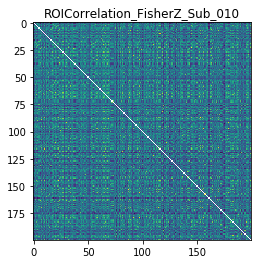

In [17]:
for i in subjects:
    matrix = np.loadtxt(p + '\\ROICorrelation_FisherZ_'+ i +'.txt')
    plt.imshow(matrix)
    plt.title('ROICorrelation_FisherZ_' + i)
    plt.savefig(p + '\\ROICorrelation_FisherZ_' + i +'.png')

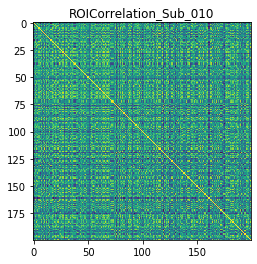

In [18]:
for i in subjects:
    matrix = np.loadtxt(p + '\\ROICorrelation_'+ i +'.txt')
    plt.imshow(matrix)
    plt.title('ROICorrelation_' + i)
    plt.savefig(p + '\\ROICorrelation_' + i +'.png')

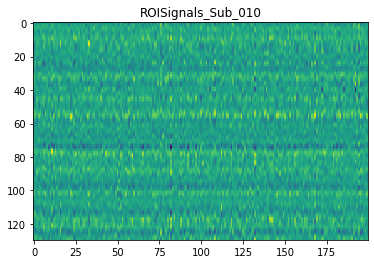

In [19]:
for i in subjects:
    matrix = np.loadtxt(p + '\\ROISignals_'+ i +'.txt')
    plt.imshow(matrix)
    plt.title('ROISignals_' + i)
    plt.savefig(p + '\\ROISignals_' + i +'.png')

In [89]:
for i in subjects:
    p = r'D:\result0620\Results\FunImgARFCB_ROISignals\ROISignals_' + i + '.txt'
    s = np.loadtxt(p)
    print('ROISignals_' + i + ': ', s.shape)
for i in subjects:
    p = r'D:\result0620\Results\FunImgARFCB_ROISignals\ROICorrelation_' + i + '.txt'
    s = np.loadtxt(p)
    print('ROICorrelation_' + i + ': ', s.shape)
for i in subjects:
    p = r'D:\result0620\Results\FunImgARFCB_ROISignals\ROICorrelation_FisherZ_' + i + '.txt'
    s = np.loadtxt(p)
    print('ROICorrelation_FisherZ_' + i + ': ', s.shape)

ROISignals_Sub_001:  (83, 116)
ROISignals_Sub_002:  (107, 116)
ROISignals_Sub_003:  (124, 116)
ROISignals_Sub_004:  (121, 116)
ROISignals_Sub_005:  (89, 116)
ROISignals_Sub_006:  (86, 116)
ROISignals_Sub_007:  (130, 116)
ROISignals_Sub_008:  (116, 116)
ROISignals_Sub_009:  (116, 116)
ROISignals_Sub_010:  (91, 116)
ROICorrelation_Sub_001:  (116, 116)
ROICorrelation_Sub_002:  (116, 116)
ROICorrelation_Sub_003:  (116, 116)
ROICorrelation_Sub_004:  (116, 116)
ROICorrelation_Sub_005:  (116, 116)
ROICorrelation_Sub_006:  (116, 116)
ROICorrelation_Sub_007:  (116, 116)
ROICorrelation_Sub_008:  (116, 116)
ROICorrelation_Sub_009:  (116, 116)
ROICorrelation_Sub_010:  (116, 116)
ROICorrelation_FisherZ_Sub_001:  (116, 116)
ROICorrelation_FisherZ_Sub_002:  (116, 116)
ROICorrelation_FisherZ_Sub_003:  (116, 116)
ROICorrelation_FisherZ_Sub_004:  (116, 116)
ROICorrelation_FisherZ_Sub_005:  (116, 116)
ROICorrelation_FisherZ_Sub_006:  (116, 116)
ROICorrelation_FisherZ_Sub_007:  (116, 116)
ROICorrelation_F

----------
# Version check

In [10]:
dicom.__version__

'2.0.0'

In [11]:
nib.__version__

'3.1.0'

# NII file

In [20]:
path = r'D:\results0622\Results\fALFF_FunImgWC'
img = nib.load(path + '\\zfALFFMap_Sub_001.nii')
img_data = img.get_fdata()
print(img.header.get_data_shape())
img_data[6, 29, 21]

(61, 73, 61)


0.6847445964813232

Text(0.5, 0.98, 'Center slices for EPI image')

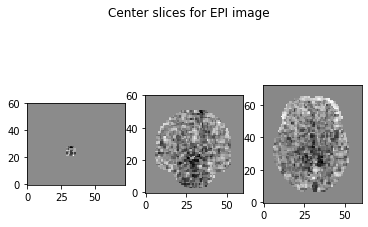

In [22]:
def show_slices(slices):
    fig,axes = plt.subplots(1,len(slices))
    for i,slice in enumerate(slices):
        axes[i].imshow(slice.T,cmap="gray",origin="lower")

slice_0 = img_data[6, :, :]
slice_1 = img_data[:, 29, :]
slice_2 = img_data[:, :, 21]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

# DCM file

In [13]:
img_hcy = dicom.dcmread(path + '\\FunRaw\\Sub_001\\000001.dcm')
print(img_hcy)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.374667898811965955833216997681997868070
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008, 0013) Instance Creation Time              TM: '160318'
(0008, 0014) Instance Creator UID                UI: 2.16.124.113543.6006.99.3051493601938435224
(0008, 0016) SOP Class UID      